In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("../../")

import pyaldata as pyal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tools.reports.report_initial import run_initial_report
from tools.params import Params, colors
from tools.dsp.preprocessing import preprocess
import tools.viz.mean_firing as firing
import tools.viz.dimensionality as dim
import tools.viz.utilityTools as vizutils
import tools.decoding.rrr as rrr
import tools.decoding.decodeTools as decutils
import tools.dataTools as dt




# 12th of March

In [3]:
# Files 
session = 'M063_2025_03_12_14_00'
data_dir = f"/data/bnd-data/raw/M063/{session}"

areas=["MOp", "SSp", "CP", "VAL"]
df = pyal.load_pyaldata(data_dir)
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field SSp_KSLabel could not be converted to i

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (94, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (198, 16000)
Resulting all_spikes ephys data shape is (NxT): (21, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (180, 16000)
Resulting CP_spikes ephys data shape is (NxT): (302, 16000)


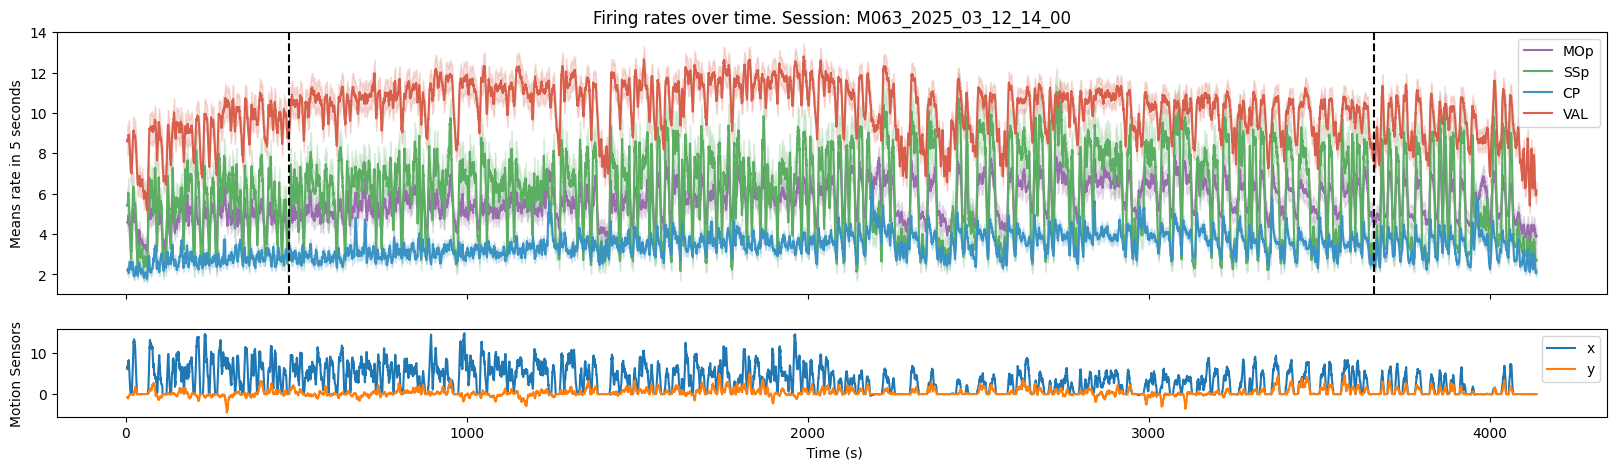

In [6]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()


# 13th March

In [9]:
# Files 
session = 'M063_2025_03_13_14_00'
data_dir = f"/data/bnd-data/raw/M063/{session}"

areas=["MOp", "SSp", "CP", "VAL"]
df = pyal.load_pyaldata(data_dir)
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
arr

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (43, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (188, 16000)
Resulting SSp_spikes ephys data shape is (NxT): (131, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (197, 16000)
Resulting CP_spikes ephys data shape is (NxT): (408, 16000)


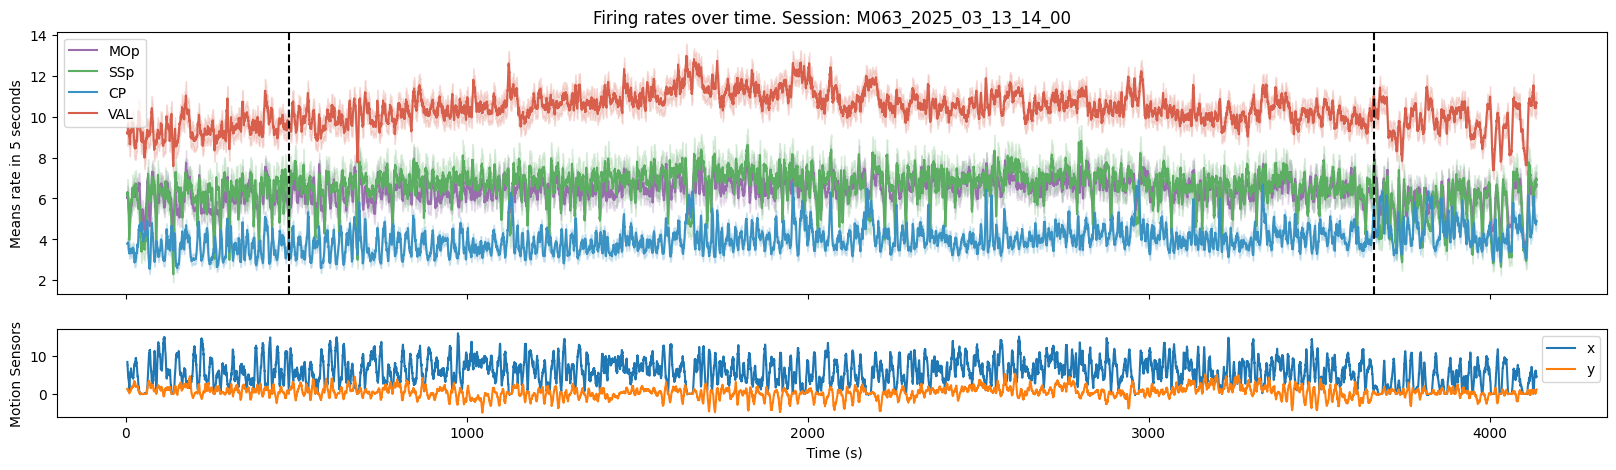

In [10]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()


# 14th March

In [11]:
# Files 
session = 'M063_2025_03_14_15_30'
data_dir = f"/data/bnd-data/raw/M063/{session}"

areas=["MOp", "SSp", "CP", "VAL"]
df = pyal.load_pyaldata(data_dir)
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
fie

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (260, 20000)
Resulting SSp_spikes ephys data shape is (NxT): (92, 20000)
Resulting all_spikes ephys data shape is (NxT): (38, 20000)
Resulting CP_spikes ephys data shape is (NxT): (329, 20000)
Resulting MOp_spikes ephys data shape is (NxT): (161, 20000)


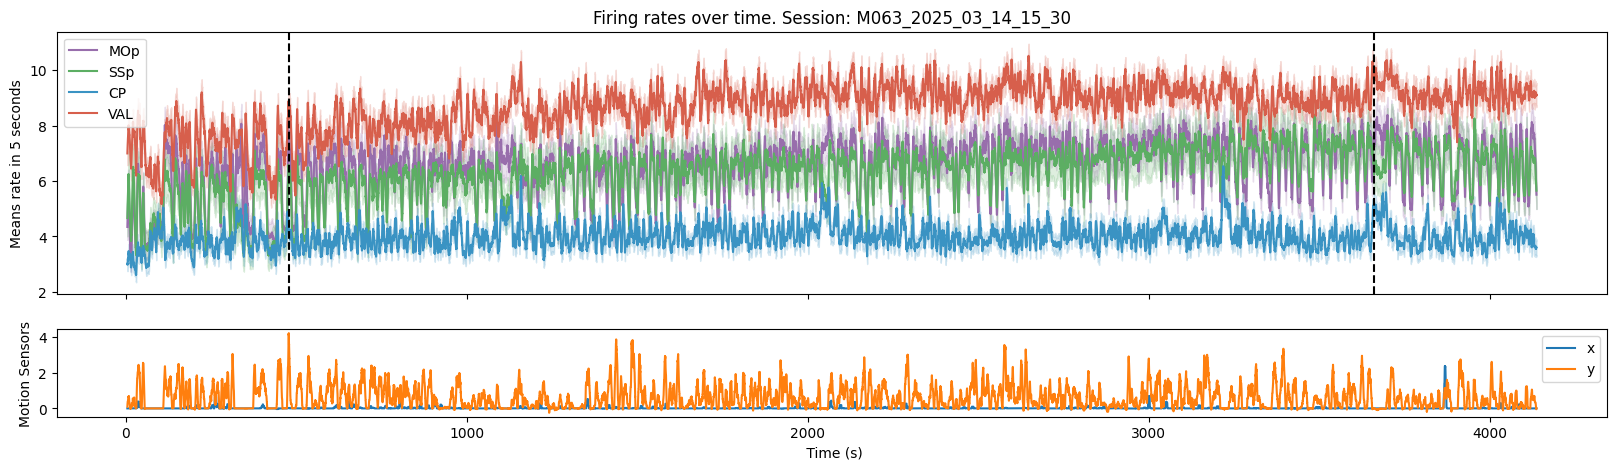

In [12]:
from scipy import stats
from tools import params
from tools.dsp.utils import moving_window_mean
from tools.viz.utilityTools import shaded_errorbar

window = 5  # in seconds

fig, ax = plt.subplots(2, 1, figsize=(20, 5), sharex='all', gridspec_kw={'height_ratios': [3, 1]})
areas=["MOp", "SSp", "CP", "VAL"]


for area in areas:
    all_rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)
    means, time_bins = moving_window_mean(all_rates, int(window / Params.BIN_SIZE))
    shaded_errorbar(ax[0], x=time_bins * Params.BIN_SIZE, y=means, errorStat=stats.sem, 
                    color=getattr(params.colors, f"{area}_light", "k"),
                    label=area
                    )
    
all_motion_sensor_x = np.concatenate(df_[f"values_MotSen1_X"].values, axis=0)
all_motion_sensor_y = np.concatenate(df_[f"values_MotSen1_Y"].values, axis=0)

motion_sensor_means_x, _ = moving_window_mean(all_motion_sensor_x, int(window / Params.BIN_SIZE))
motion_sensor_means_y, _ = moving_window_mean(all_motion_sensor_y, int(window / Params.BIN_SIZE))

ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_x, label='x')
ax[1].plot(time_bins * Params.BIN_SIZE, motion_sensor_means_y, label='y')
ax[1].set_ylabel(f'Motion Sensors')
ax[1].legend()


ax[0].set_ylabel(f'Means rate in {window} seconds')
ax[1].set_xlabel(f' Time (s)')
ax[0].axvline(x=480, color="k", linestyle="--")
ax[0].axvline(x=3660, color="k", linestyle="--")
ax[0].set_title(f'Firing rates over time. Session: {session}')
ax[0].legend()
